In [1]:
#imports pandas and shorten the name
import pandas as pd

#import numpy so you can use arrays and get random numbers and shorten the name
import numpy as np

#import matplotlib.pyplot so you can make plots and charts and shorten the name
import matplotlib.pyplot as plt

#import requests so you can make API calls
import requests

#import time so you can use dates and timepoints
import time


#import json so python can make sense of the data from the API call
import json

#import the ability to do linear regressions from the scipy.stats package
from scipy.stats import linregress

#import the API key for OpenWeather from the config file
from resource import api_key

#import the ability to find the nearest city to a set of coordinates 
#link is pip install citipy
from citipy import citipy




In [2]:
#create output file to use later
output_data_file = "output_data/cities.csv"

Generate Cities List

In [3]:
# make the range of latitudes that encompasses the whole world
lat_range = (-90,90)

#make the range of longitudes that emcompasses the whole world
long_range = (-180,180)


In [4]:
#create an empty list to hold the latitudes and longitudes
lat_longs = []

#create an empty list to hold the city names
cities =[]



In [5]:
#explain what's going to go in the lat_long list
#first, generate the random latitudes using numpy/np
#get random numbers for -90 to 90 deg latitude, getting 1,500 to be sure that there will be 500 to work with
#put them in a list and keep adding rows until you get 1,500 rows
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)

#do the same for longitudes
long = np.random.uniform(lat_range[0], lat_range[1], size = 1500)

#merge the files together into lat_long
lat_longs = zip(lat,long)

In [6]:
#find the cities nearest to the lat_long points 
#this is a for statement
# for each element in the lat_long list, 
for lat_long in lat_longs:
    #use the notation from citipy website
    #city = citipy.nearest_city(lat, long)
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name
    
    #if the name is unique, add it to the list of names
    if city not in cities:
        cities.append(city)
        
#Check how many cities there are
len(cities)



596

In [7]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#this is the starting url without all the city names

url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"


#Make a list to hold all the city data
city_data = []

#make a log so if/when something goes wrong you can find it
print("Beginning Data Retreival                   ")
print("-------------------------------------------")

#create a counter for the log, set the opening number of the counter at 1
record_count = 1
set_count = 1


#Loop through the cities and find a temperature for each city
#for each city in the city list, create an api call for the temperature if the city has a unique value with a maximum of 500. 
#use enumerate to loop through the cities to get a list of the cities and an index of number of iterations. This will need to be appended to. 

for i, city in enumerate (cities):
    
    #if the index number for a city in the city table has a remainder of 0 and the index of that city is greater than or equal to 50
    if (i % 50 == 0 and i >=50):
        #set the index of that city at 1 and run the group of numbers until you get to the next mod 0 as a set. Then take a 60 second break.
        set_count += 1
        record_count= 0
        #make a confirmation notice of set breaks
        print ("End of set.")
        time.sleep(60)
   #add a url for each city
    city_url = f"{url}&q={city}&units={units}&appid={api_key}"
    
    #print the record and set numbers in the log
    print (f" Record {record_count} of Set {set_count} | {city}")
    print (city_url)
    
    #start the record count at 1
    record_count +=1
      
    #run the API request for the cities and return it in a json formatted list
    try:

        city_weather = requests.get(city_url).json()
        
        #here are the items we want
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humid = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #add the the information into the city_data list and give it an easy to read column name
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Long": city_long,
                          "Max Temp": city_temp,
                          "Humidity": city_humid,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
        
       #if any of the retrivial requests is missing,print NA on the log 
    
    except:    
        print("NA")
        pass
    
    print("Process Complete")
       

Beginning Data Retreival                   
-------------------------------------------
 Record 1 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?&q=hithadhoo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 1 | barentsburg
http://api.openweathermap.org/data/2.5/weather?&q=barentsburg&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 3 of Set 1 | monte azul
http://api.openweathermap.org/data/2.5/weather?&q=monte azul&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?&q=bambous virieux&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?&q=qaanaa

 Record 0 of Set 2 | caravelas
http://api.openweathermap.org/data/2.5/weather?&q=caravelas&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 1 of Set 2 | narsaq
http://api.openweathermap.org/data/2.5/weather?&q=narsaq&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 2 | hambantota
http://api.openweathermap.org/data/2.5/weather?&q=hambantota&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 2 | rondonopolis
http://api.openweathermap.org/data/2.5/weather?&q=rondonopolis&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 2 | hearst
http://api.openweathermap.org/data/2.5/weather?&q=hearst&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 2 | maceio
http://api.openweathermap.org/data/2.5/weather?&q=maceio&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 2 | santiago del este

Process Complete
 Record 1 of Set 3 | zdvinsk
http://api.openweathermap.org/data/2.5/weather?&q=zdvinsk&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 3 | marcona
http://api.openweathermap.org/data/2.5/weather?&q=marcona&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 3 of Set 3 | dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 3 | thompson
http://api.openweathermap.org/data/2.5/weather?&q=thompson&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 3 | muyezerskiy
http://api.openweathermap.org/data/2.5/weather?&q=muyezerskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 3 | barbastro
http://api.openweathermap.org/data/2.5/weather?&q=barbastro&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 3 |

Process Complete
 Record 2 of Set 4 | male
http://api.openweathermap.org/data/2.5/weather?&q=male&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 4 | santo antonio do ica
http://api.openweathermap.org/data/2.5/weather?&q=santo antonio do ica&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 4 | grand river south east
http://api.openweathermap.org/data/2.5/weather?&q=grand river south east&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 5 of Set 4 | streator
http://api.openweathermap.org/data/2.5/weather?&q=streator&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 4 | trairi
http://api.openweathermap.org/data/2.5/weather?&q=trairi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 4 | salalah
http://api.openweathermap.org/data/2.5/weather?&q=salalah&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f

Process Complete
 Record 2 of Set 5 | tumannyy
http://api.openweathermap.org/data/2.5/weather?&q=tumannyy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 3 of Set 5 | formoso do araguaia
http://api.openweathermap.org/data/2.5/weather?&q=formoso do araguaia&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 4 of Set 5 | viligili
http://api.openweathermap.org/data/2.5/weather?&q=viligili&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 5 of Set 5 | castro
http://api.openweathermap.org/data/2.5/weather?&q=castro&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 5 | kasempa
http://api.openweathermap.org/data/2.5/weather?&q=kasempa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 5 | alekseyevka
http://api.openweathermap.org/data/2.5/weather?&q=alekseyevka&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process C

Process Complete
 Record 3 of Set 6 | cayenne
http://api.openweathermap.org/data/2.5/weather?&q=cayenne&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 6 | governador valadares
http://api.openweathermap.org/data/2.5/weather?&q=governador valadares&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 6 | moroni
http://api.openweathermap.org/data/2.5/weather?&q=moroni&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 6 | uddevalla
http://api.openweathermap.org/data/2.5/weather?&q=uddevalla&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 6 | bengkulu
http://api.openweathermap.org/data/2.5/weather?&q=bengkulu&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 6 | balmazujvaros
http://api.openweathermap.org/data/2.5/weather?&q=balmazujvaros&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Co

Process Complete
 Record 4 of Set 7 | grand gaube
http://api.openweathermap.org/data/2.5/weather?&q=grand gaube&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 7 | muzhi
http://api.openweathermap.org/data/2.5/weather?&q=muzhi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 7 | nantucket
http://api.openweathermap.org/data/2.5/weather?&q=nantucket&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 7 | bani walid
http://api.openweathermap.org/data/2.5/weather?&q=bani walid&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 7 | numi
http://api.openweathermap.org/data/2.5/weather?&q=numi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 9 of Set 7 | vozrozhdeniye
http://api.openweathermap.org/data/2.5/weather?&q=vozrozhdeniye&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 o

Process Complete
 Record 5 of Set 8 | togur
http://api.openweathermap.org/data/2.5/weather?&q=togur&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 8 | shawville
http://api.openweathermap.org/data/2.5/weather?&q=shawville&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 8 | abu zabad
http://api.openweathermap.org/data/2.5/weather?&q=abu zabad&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 8 | lusambo
http://api.openweathermap.org/data/2.5/weather?&q=lusambo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 8 | kuytun
http://api.openweathermap.org/data/2.5/weather?&q=kuytun&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 8 | humberto de campos
http://api.openweathermap.org/data/2.5/weather?&q=humberto de campos&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11

Process Complete
 Record 6 of Set 9 | iquique
http://api.openweathermap.org/data/2.5/weather?&q=iquique&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 9 | lukovetskiy
http://api.openweathermap.org/data/2.5/weather?&q=lukovetskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 9 | tsentralnyy
http://api.openweathermap.org/data/2.5/weather?&q=tsentralnyy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 9 of Set 9 | eydhafushi
http://api.openweathermap.org/data/2.5/weather?&q=eydhafushi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 9 | marzuq
http://api.openweathermap.org/data/2.5/weather?&q=marzuq&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 9 | kuusamo
http://api.openweathermap.org/data/2.5/weather?&q=kuusamo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12

Process Complete
 Record 7 of Set 10 | boa vista
http://api.openweathermap.org/data/2.5/weather?&q=boa vista&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 10 | lukulu
http://api.openweathermap.org/data/2.5/weather?&q=lukulu&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 10 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?&q=plettenberg bay&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 10 | mogadishu
http://api.openweathermap.org/data/2.5/weather?&q=mogadishu&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 10 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?&q=mahibadhoo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 10 | shahrud
http://api.openweathermap.org/data/2.5/weather?&q=shahrud&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complet

Process Complete
 Record 8 of Set 11 | antofagasta
http://api.openweathermap.org/data/2.5/weather?&q=antofagasta&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 11 | gerede
http://api.openweathermap.org/data/2.5/weather?&q=gerede&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 11 | opuwo
http://api.openweathermap.org/data/2.5/weather?&q=opuwo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 11 | staryy nadym
http://api.openweathermap.org/data/2.5/weather?&q=staryy nadym&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 11 | kasane
http://api.openweathermap.org/data/2.5/weather?&q=kasane&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 11 | kibre mengist
http://api.openweathermap.org/data/2.5/weather?&q=kibre mengist&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Re

Process Complete
 Record 9 of Set 12 | yining
http://api.openweathermap.org/data/2.5/weather?&q=yining&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 12 | lumeje
http://api.openweathermap.org/data/2.5/weather?&q=lumeje&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 12 | koutsouras
http://api.openweathermap.org/data/2.5/weather?&q=koutsouras&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 12 | kharan
http://api.openweathermap.org/data/2.5/weather?&q=kharan&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 12 | port-gentil
http://api.openweathermap.org/data/2.5/weather?&q=port-gentil&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 14 of Set 12 | bonavista
http://api.openweathermap.org/data/2.5/weather?&q=bonavista&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 15 o

In [8]:
#make the above into a dataframe
city_data_pd = pd.DataFrame(city_data)



In [9]:
#get city dataframe info
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        552 non-null    object 
 1   Lat         552 non-null    float64
 2   Long        552 non-null    float64
 3   Max Temp    552 non-null    float64
 4   Humidity    552 non-null    int64  
 5   Cloudiness  552 non-null    int64  
 6   Wind Speed  552 non-null    float64
 7   Country     552 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 34.6+ KB


In [10]:
#create the csv
#extract the relevant columns
clean_city_data_df = city_data_pd[["City", "Lat", "Long", "Max Temp", "Humidity","Cloudiness","Wind Speed"]]
clean_city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,hithadhoo,-0.6000,73.0833,82.44,71,28,10.71
1,monte azul,-15.1550,-42.8747,73.45,73,77,2.98
2,ushuaia,-54.8000,-68.3000,40.66,87,100,13.80
3,bambous virieux,-20.3428,57.7575,80.22,83,100,18.57
4,qaanaaq,77.4840,-69.3632,-0.42,62,0,7.34


In [11]:
#make the csv with the extracted fields
clean_city_data_df.to_csv("output/city_data.csv", index=False, header=True)

Figure 1. Lattitude vs Temperature

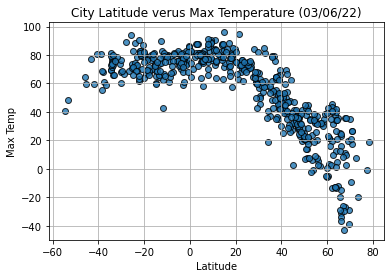

In [12]:
#Scatterplot of Lattitude versus Temperature
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Max Temp"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.1.png")  

plt.show()

Figure 2. Latitude vs. Humidity

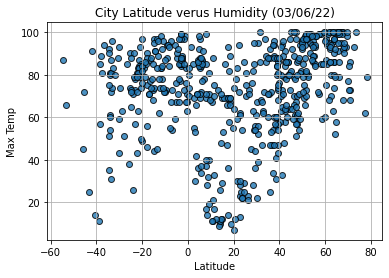

In [13]:
#Scatterplot of Lattitude versus Hudimity
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Humidity"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.2.png")  

plt.show()

Figure 3.  Latitute vs. Cloudiness


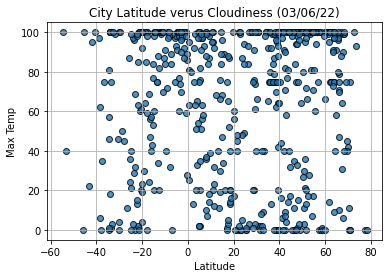

In [14]:
#Scatterplot of Lattitude versus Cloudiness
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Cloudiness"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.4.png")  

plt.show()

Latitude vs Windspeed

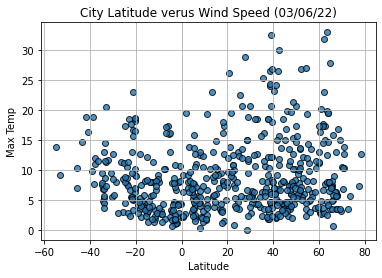

In [15]:
#Scatterplot of Lattitude versus Wind Speed
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Wind Speed"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.4.png")  

plt.show()

Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    
    #Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [17]:
# Create dataframes to use with the linear regression function
#northern hemisphere
northern_hem_df = clean_city_data_df.loc[(city_data_pd["Lat"] >=0)]
northern_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 4 to 551
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        385 non-null    object 
 1   Lat         385 non-null    float64
 2   Long        385 non-null    float64
 3   Max Temp    385 non-null    float64
 4   Humidity    385 non-null    int64  
 5   Cloudiness  385 non-null    int64  
 6   Wind Speed  385 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 24.1+ KB


In [18]:
#southern hemisphere
southern_hem_df = clean_city_data_df.loc[(city_data_pd["Lat"] <0)]
southern_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 550
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        167 non-null    object 
 1   Lat         167 non-null    float64
 2   Long        167 non-null    float64
 3   Max Temp    167 non-null    float64
 4   Humidity    167 non-null    int64  
 5   Cloudiness  167 non-null    int64  
 6   Wind Speed  167 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 10.4+ KB


Max Temp Linear Regression


The r-value is: 0.7467685153053162


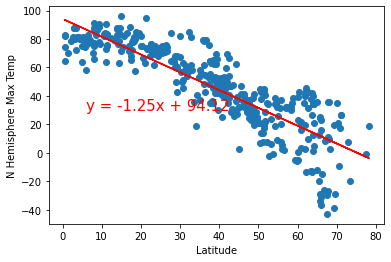

In [19]:
#Northern Hemisphere (y is the dependent variable/Max Temp)
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

plot_linear_regression(x_values, y_values, "N Hemisphere Max Temp", (6,30))

The r-value is: 0.0766777987250962


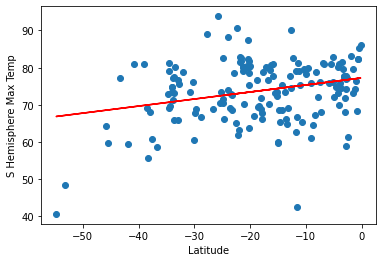

In [20]:
#Southern Hemisphere (y is the dependent variable/Max Temp)
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

plot_linear_regression(x_values, y_values, "S Hemisphere Max Temp", (6,30))

Humidity(%) Linear Regression

The r-value is: 0.22341150342292856


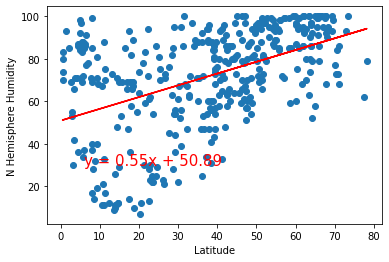

In [21]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

plot_linear_regression(x_values, y_values, "N Hemisphere Humidity", (6,30))

The r-value is: 0.10643544466217005


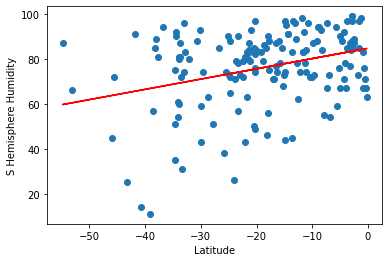

In [22]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

plot_linear_regression(x_values, y_values, "S Hemisphere Humidity", (6,30))

Cloudiness Linear Regression

The r-value is: 0.013593670410371152


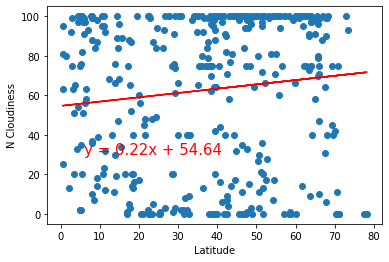

In [23]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "N Cloudiness", (6,30))

The r-value is: 0.10477259059120364


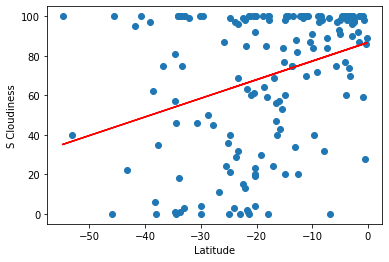

In [24]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "S Cloudiness", (6,30))

Wind Speed Linear Regression

The r-value is: 0.017053114648637863


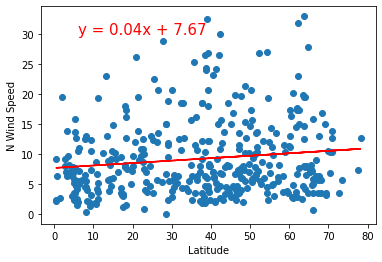

In [25]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "N Wind Speed", (6,30))

The r-value is: 0.13679996501979536


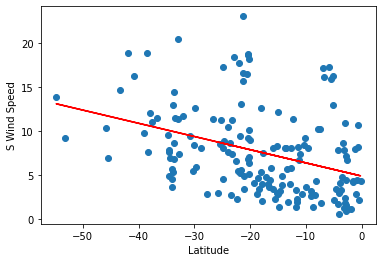

In [26]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "S Wind Speed", (6,30))

Analysis: Based on the linear regressions of the latitude and max temperature, humidity, cloudiness, and wind speed, there is little to no correlation between latitude and the other factors. The one exception is the relation between maximum temperature and latitude in the northern hemisphere, which had an r-value of 0.77. The r-values for the remaining regressions were 0.2 or less. 